In [1]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from samplers import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

## QNN

In [2]:
backend = Aer.get_backend('qasm_simulator')

In [3]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.3, 0.02) - gaussian(x, 0.7, 0.02) 

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)

y_deriv_num = (y[1:] - y[:-1])/(x[1]-x[0])

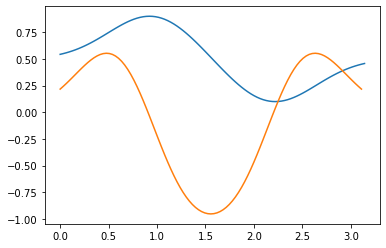

In [4]:
plt.plot(x, y)
plt.plot(x[:-1], y_deriv_num)
plt.show()

In [5]:
np.random.seed(42)

qnn = sequential_qnn(q_bits = [1, 3, 3],
                     dim = [1, 3, 3, 1],
                     reps = 2,
                     backend=backend,
                     shots=10000,
                     lr = 0.1)

qnn.train(x, y, epochs=200, verbose=True)
    

saver(qnn, data_path("qnn_deriv"))

  0%|          | 0/200 [00:00<?, ?it/s]

Process ForkProcess-75:
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/multiprocessing/queues.py", line 102, in get
    with self._rlock:
Traceback (most recent call last):
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/concurrent/futures/process.py", line 237, in _process_worker
    call_item = call_queue.get(block=True)
  File "/home/kristian/anaconda3/envs/env_qiskit/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt


QiskitError: 'Keyboard interrupt in parallel_map.'

In [22]:
np.random.seed(42)

dnn = sequential_dnn(dim = [1, 5, 5, 1], scale = [0.9, 0.9, 0.9], lr = 0.1)

dnn.train(x, y, epochs=1000, verbose=True)
    

saver(dnn, data_path("dnn_deriv"))

  0%|          | 0/1000 [00:00<?, ?it/s]

epoch: 0, loss: 0.11285731686214345
epoch: 1, loss: 0.08958563326520455
epoch: 2, loss: 0.07563047364440871
epoch: 3, loss: 0.07234076736051763
epoch: 4, loss: 0.07549483458258865
epoch: 5, loss: 0.07651657704160132
epoch: 6, loss: 0.07418442141425857
epoch: 7, loss: 0.07069277004668498
epoch: 8, loss: 0.06805176796776732
epoch: 9, loss: 0.06696742265373383
epoch: 10, loss: 0.06693988373230578
epoch: 11, loss: 0.06703001045677945
epoch: 12, loss: 0.06651411179746251
epoch: 13, loss: 0.06509476130979311
epoch: 14, loss: 0.06287935588794702
epoch: 15, loss: 0.06034587864691088
epoch: 16, loss: 0.05826387014592774
epoch: 17, loss: 0.057317930311157346
epoch: 18, loss: 0.05727965007806533
epoch: 19, loss: 0.05687371608750755
epoch: 20, loss: 0.05524810680687537
epoch: 21, loss: 0.05266199186157048
epoch: 22, loss: 0.04992854241348305
epoch: 23, loss: 0.04769305433596989
epoch: 24, loss: 0.04601111513505758
epoch: 25, loss: 0.044457066860865264
epoch: 26, loss: 0.04260981798290553
epoch: 27

epoch: 534, loss: 9.800937030134832e-05
epoch: 535, loss: 9.798802161721789e-05
epoch: 536, loss: 9.804859546758447e-05
epoch: 537, loss: 9.78443512784884e-05
epoch: 538, loss: 9.743230679965628e-05
epoch: 539, loss: 9.751584317875203e-05
epoch: 540, loss: 9.761667444810581e-05
epoch: 541, loss: 9.706559319010117e-05
epoch: 542, loss: 9.702356626592602e-05
epoch: 543, loss: 9.727698622078014e-05
epoch: 544, loss: 9.679918354599792e-05
epoch: 545, loss: 9.665324297993362e-05
epoch: 546, loss: 9.683059299428042e-05
epoch: 547, loss: 9.652328481443644e-05
epoch: 548, loss: 9.637892323877494e-05
epoch: 549, loss: 9.635485198035841e-05
epoch: 550, loss: 9.619378408859092e-05
epoch: 551, loss: 9.614062846727736e-05
epoch: 552, loss: 9.593069425007461e-05
epoch: 553, loss: 9.58213960413162e-05
epoch: 554, loss: 9.585168152796094e-05
epoch: 555, loss: 9.557010099355473e-05
epoch: 556, loss: 9.546042955675392e-05
epoch: 557, loss: 9.54815418613858e-05
epoch: 558, loss: 9.524576152582363e-05
epo

In [23]:
y_pred = dnn.predict(x)
y_deriv = dnn.deriv(x)

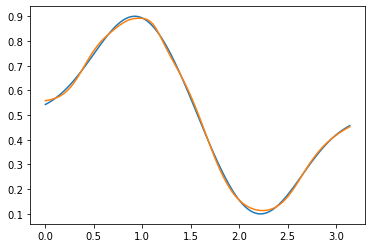

In [24]:
plt.plot(x, y)
plt.plot(x, y_pred)
plt.show()

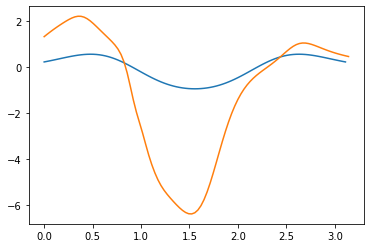

In [25]:
plt.plot(x[:-1], y_deriv_num)
plt.plot(x, y_deriv)
plt.show()